In [1]:
import numpy as np
import pcs as pcs
import matplotlib.pyplot as plt
from nepc import nepc
from nepc.methods.mp import mp as mp
from nepc.methods.thomson import thomson as thomson
from nepc.util.constants import N2_DIATOMIC_CONSTANTS
from nepc.util.constants import MU_NITROGEN_KG

# Computing the FCF and respective partial cross sections

In [2]:
p_list=['N2(X1Sigmag+)']
pp_list=['N2+(X2Sigmag+)', 'N2+(A2Piu)', 'N2+(B2Sigmau+)']
vp_list = np.arange(1)
vpp_list = np.arange(11)
jp_list = np.arange(1)
jpp_list = np.arange(1)
psi_p_keep = [p_list,[0,5,10],[0]]
psi_pp_keep = [pp_list,[0,5,10],[0]]
dbug = False
fcf = thomson.fcf(p_list, pp_list, vp_list, vpp_list, jp_list, jpp_list,
                  diatomic_constants=N2_DIATOMIC_CONSTANTS,
                  reduced_mass=MU_NITROGEN_KG,
                  k=17,
                  delta_r=.5,
                  psi_p_keep=psi_p_keep,
                  psi_pp_keep=psi_pp_keep,
                  dbug=False)[4]
ee_pcs = []
for p in np.arange(1):
    """ee_pcs[p]"""
    ee_pcs.append([])
    for pp in np.arange(3):
        """ee_pcs[p][pp]"""
        ee_pcs[p].append([])
        for vp in vp_list:
            """ee_pcs[p][pp][vp]"""
            ee_pcs[p][pp].append([])
            """ee_pcs[p][pp][vp][vpp]"""
            for vpp in vpp_list:
                """ee_pcs[p][pp][vp][vpp][[ee, pcs]]"""
                ee_pcs[p][pp][vp].append(pcs.pcs(p_list[p], pp_list[pp], vp, vpp, fcf[p][pp][0][0][vp][vpp]))

# Closure relationship for FCF
If the FCF sum over vpp for a given vp are greater than 0.99, that's were we'll stop including cross sections

In [3]:
for p in np.arange(1):
    for pp in np.arange(3):
        for vp in vp_list:
            sum_fcf = 0
            for vpp in vpp_list: 
                tmp_fcf = fcf[p][pp][0][0][vp][vpp]
                sum_fcf += tmp_fcf
                if sum_fcf > 0.99:
                    print(sum_fcf, '> 0.99, vpp:', vpp)
                    break

0.9968899044142606 > 0.99, vpp: 1
0.9938864563071661 > 0.99, vpp: 5
0.9961254039105287 > 0.99, vpp: 1


# Sorting partial cross sections

In [4]:
INCIDENT_ENERGY = [16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 110.0, 120.0, 140.0, 160.0, 180.0, 200.0, 225.0, 250.0, 275.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0]
ITIKAWA = np.asarray([0.0211, 0.0466, 0.0713, 0.0985, 0.129, 0.164, 0.199, 0.23, 0.27, 0.308, 0.344, 0.38, 0.418, 0.455, 0.492, 0.528, 0.565, 0.603, 0.64, 0.929, 1.16, 1.37, 1.52, 1.6, 1.66, 1.72, 1.74, 1.78, 1.8, 1.81, 1.82, 1.83, 1.85, 1.85, 1.83, 1.81, 1.78, 1.72, 1.67, 1.61, 1.55, 1.48, 1.41, 1.37, 1.28, 1.2, 1.11, 1.05, 0.998, 0.943, 0.88, 0.844, 0.796, 0.765, 0.738, 0.719, 0.698, 0.676])

In [5]:
X1_X2 = []
for vp in vp_list:
    """X1_X2[vp]"""
    X1_X2.append([])
    for vpp in vpp_list:
        """X1_X2[vp][vpp][pcs]"""
        sigma = []
        for i in np.arange(58):
            sigma.append(ee_pcs[0][0][vp][vpp][i][1])
        X1_X2[vp].append(np.asarray(sigma))

X1_A2 = []
for vp in vp_list:
    """X1_A2[vp]"""
    X1_A2.append([])
    for vpp in vpp_list:
        """X1_A2[vp][vpp][pcs]"""
        sigma = []
        for i in np.arange(58):
            sigma.append(ee_pcs[0][1][vp][vpp][i][1])
        X1_A2[vp].append(np.asarray(sigma))
        
X1_B2 = []
for vp in vp_list:
    """X1_B2[vp]"""
    X1_B2.append([])
    for vpp in vpp_list:
        """X1_B2[vp][vpp][pcs]"""
        sigma = []
        for i in np.arange(58):
            sigma.append(ee_pcs[0][2][vp][vpp][i][1])
        X1_B2[vp].append(np.asarray(sigma))

# Figures and Tables

## N2 X1Sigmag+ to N2+ X2Sigmag+

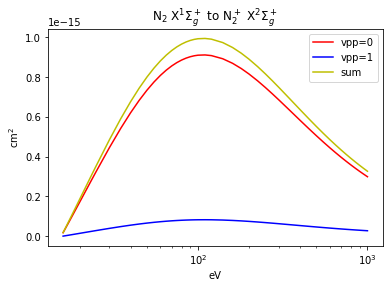

In [6]:
fig1, ax1 = plt.subplots(1)
ax1.plot(INCIDENT_ENERGY, X1_X2[0][0]*100**2, 'r-', label='vpp=0')
ax1.plot(INCIDENT_ENERGY, X1_X2[0][1]*100**2, 'b-', label='vpp=1')
ax1.plot(INCIDENT_ENERGY, (X1_X2[0][0]+X1_X2[0][1])*100**2, 'y-', label='sum')
ax1.set_xscale('log')
ax1.set_ylabel('cm$^2$')
ax1.set_xlabel('eV')
ax1.set_title(r'N$_2$ X$^1\Sigma_g^+$ to N$_2^+$ X$^2\Sigma_g^+$')
ax1.legend()
plt.show()

In [22]:
"""Table data in LaTeX format"""
print('\hline')
for i in np.arange(58):
    print(r'   %.1f & %.4f & %.4f & %.4f \\' %(INCIDENT_ENERGY[i], X1_X2[0][0][i]*1e20, X1_X2[0][1][i]*1e20, (X1_X2[0][0][i]+X1_X2[0][1][i])*1e20))
print('\hline')

\hline
   16.0 & 0.1776 & 0.0057 & 0.1833 \\
   16.5 & 0.3846 & 0.0245 & 0.4090 \\
   17.0 & 0.5864 & 0.0428 & 0.6292 \\
   17.5 & 0.7833 & 0.0607 & 0.8440 \\
   18.0 & 0.9755 & 0.0781 & 1.0536 \\
   18.5 & 1.1629 & 0.0951 & 1.2580 \\
   19.0 & 1.3459 & 0.1117 & 1.4576 \\
   19.5 & 1.5244 & 0.1280 & 1.6524 \\
   20.0 & 1.6987 & 0.1438 & 1.8425 \\
   20.5 & 1.8689 & 0.1593 & 2.0281 \\
   21.0 & 2.0350 & 0.1744 & 2.2093 \\
   21.5 & 2.1972 & 0.1891 & 2.3863 \\
   22.0 & 2.3556 & 0.2036 & 2.5591 \\
   22.5 & 2.5102 & 0.2176 & 2.7279 \\
   23.0 & 2.6613 & 0.2314 & 2.8927 \\
   23.5 & 2.8089 & 0.2448 & 3.0537 \\
   24.0 & 2.9531 & 0.2580 & 3.2111 \\
   24.5 & 3.0939 & 0.2708 & 3.3648 \\
   25.0 & 3.2316 & 0.2834 & 3.5149 \\
   30.0 & 4.4478 & 0.3945 & 4.8423 \\
   35.0 & 5.4201 & 0.4836 & 5.9037 \\
   40.0 & 6.2014 & 0.5554 & 6.7568 \\
   45.0 & 6.8315 & 0.6135 & 7.4451 \\
   50.0 & 7.3405 & 0.6606 & 8.0011 \\
   55.0 & 7.7514 & 0.6988 & 8.4502 \\
   60.0 & 8.0824 & 0.7297 & 8.8121 \\
   65

## N2 X1Sigmag+ to N2+ A2Piu

In [ ]:
fig2, ax2 = plt.subplots(1)
ax2.plot(INCIDENT_ENERGY, X1_A2[0][0]*100**2, 'r-', label='vpp=0')
ax2.plot(INCIDENT_ENERGY, X1_A2[0][1]*100**2, 'b-', label='vpp=1')
ax2.plot(INCIDENT_ENERGY, X1_A2[0][2]*100**2, 'g-', label='vpp=2')
ax2.plot(INCIDENT_ENERGY, X1_A2[0][3]*100**2, 'k-', label='vpp=3')
ax2.plot(INCIDENT_ENERGY, X1_A2[0][4]*100**2, 'm-', label='vpp=4')
ax2.plot(INCIDENT_ENERGY, X1_A2[0][5]*100**2, 'c-', label='vpp=5')
ax2.plot(INCIDENT_ENERGY, (X1_A2[0][0]+X1_A2[0][1]+X1_A2[0][2]+X1_A2[0][3]+X1_A2[0][4]+X1_A2[0][5])*100**2, 'y-', label='sum')
ax2.set_xscale('log')
ax2.set_ylabel('cm$^2$')
ax2.set_xlabel('eV')
ax2.set_title(r'N$_2$ X$^1\Sigma_g^+$ to N$_2^+$ A$^2\Pi_u$')
ax2.legend()
plt.show()

## N2 X1Sigmag+ to N2+ B2Sigmau+

In [ ]:
fig3, ax3 = plt.subplots(1)
ax3.plot(INCIDENT_ENERGY, X1_B2[0][0]*100**2, 'r-', label='vpp=0')
ax3.plot(INCIDENT_ENERGY, X1_B2[0][1]*100**2, 'b-', label='vpp=1')
ax3.plot(INCIDENT_ENERGY, (X1_B2[0][0]+X1_B2[0][1])*100**2, 'y-', label='sum')
ax3.set_xscale('log')
ax3.set_ylabel('cm$^2$')
ax3.set_xlabel('eV')
ax3.set_title(r'N$_2$ X$^1\Sigma_g^+$ to N$_2^+$ B$^2\Sigma_u^+$')
ax3.legend()
plt.show()

## Comparison against Itikawa compiled cross sections
The Itikawa total cross sections need to be multiplied by 18 to reach our total

In [ ]:
N2_N2P_TCS = X1_X2[0][0]+X1_X2[0][1]+X1_A2[0][0]+X1_A2[0][1]+X1_A2[0][2]+X1_A2[0][3]+X1_A2[0][4]+X1_A2[0][5]+X1_B2[0][0]+X1_B2[0][1]

fig4, ax4 = plt.subplots(1)
ax4.plot(INCIDENT_ENERGY, ITIKAWA*10**(-16), 'r-', label='Itikawa')
ax4.plot(INCIDENT_ENERGY, N2_N2P_TCS*100**2, 'k-', label='Total')
ax4.set_xscale('log')
ax4.set_ylabel('cm$^2$')
ax4.set_xlabel('eV')
ax4.set_title(r'Comparision of Itikawa to our Total')
ax4.legend()
plt.show()